In [3]:
# Visualize training history
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
import math
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [4]:
def sigmoid(z):
    
    g = 1 / (1 + math.e**-z)
    
    return g

In [5]:
def print_confusion_matrix(true_labels, predictions):
    #plot confusion matrix
    mat = confusion_matrix(true_labels, predictions)
    plot_confusion_matrix(conf_mat=mat)

    #Calculate precision, recall, f1_score

    #precision
    precision = precision_score(true_labels, predictions)

    #recall
    recall = recall_score(true_labels, predictions)

    #fl score
    f1 = f1_score(true_labels, predictions)

    #Print precision, recall, f1_score
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return

In [6]:
def calculate_accuracy(labels, predictions):
    
    # Calculate the number of correct predictions by comparing 'labels' and 'predictions'
    correct_predictions = np.sum(labels == predictions)
    
    # Calculate the total number of predictions
    total_predictions = len(labels)
    
    # Calculate the accuracy as a percentage
    accuracy_percentage = (correct_predictions / total_predictions) * 100.0
    
    print(f"Accuracy: {accuracy_percentage:.2f}%")

In [7]:
def get_predictions(feature_data):
    #run feature data through the trained model to get the linera activations from the output layer
    logits = model(feature_data)

    #convert the model outputs to probabilities by running through the sigmoid function
    logits = sigmoid(logits)

    # get predictions by converting output probabilities to True if >= 0.5, and False if < 0.5
    predictions = logits >= 0.5

    #convert True to 1 and False to 0
    predictions = [int(boolean) for boolean in predictions]

    return predictions

In [8]:
#load the dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

#split data set in to X, y variables
features = dataset[:,0:8]
y = dataset[:,8]

#create Scaler object
scaler = StandardScaler()

#scale the features
X = scaler.fit_transform(features)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

#look at the first X row
print(X[0])


X shape: (768, 8)
y shape: (768,)
[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
  0.46849198  1.4259954 ]


In [9]:
# split  data into training, CV, test sets
# use the train_test_split modules
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=35)

#split test set 50:50 for the CV and test sets
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5)

#Print the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_cv shape: {X_cv.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_cv shape: {y_cv.shape}")



X_train shape: (460, 8)
X_test shape: (154, 8)
X_cv shape: (154, 8)
y_train shape: (460,)
y_test shape: (154,)
y_cv shape: (154,)


In [10]:
#create model
model = Sequential([
    tf.keras.Input(shape=(8,)),
    Dense(12, activation='relu', kernel_regularizer=l2(0.0)),
    Dense(8, activation='relu', kernel_regularizer=l2(0.0)),
    Dense(1, activation='linear')
])
    

In [11]:
#print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
#compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy']    
)

#fit the model
history = model.fit(
    X, y,
    validation_data=(X_cv, y_cv),
    epochs=100
)

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 0.7755 - accuracy: 0.6146 - val_loss: 0.7504 - val_accuracy: 0.7013
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.6771 - val_loss: 0.6908 - val_accuracy: 0.7208
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.6927 - val_loss: 0.6468 - val_accuracy: 0.7273
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6283 - accuracy: 0.6901 - val_loss: 0.6162 - val_accuracy: 0.7403
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6034 - accuracy: 0.6966 - val_loss: 0.5931 - val_accuracy: 0.7403
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.7148 - val_loss: 0.5724 - val_accuracy: 0.7532
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7174 - val_loss: 0.5536 - val_accuracy: 0.7468
Epoch 8/100


In [13]:
#list history data
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


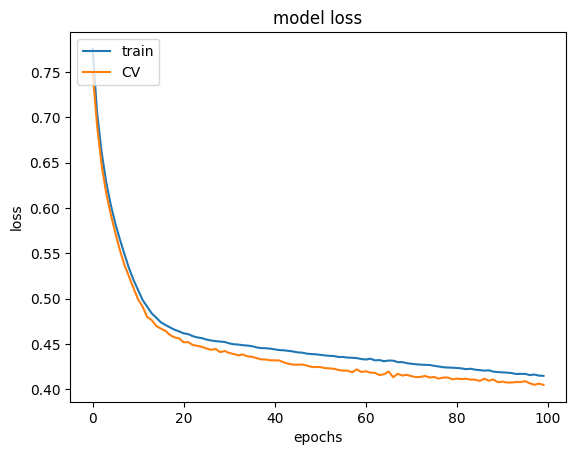

In [14]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

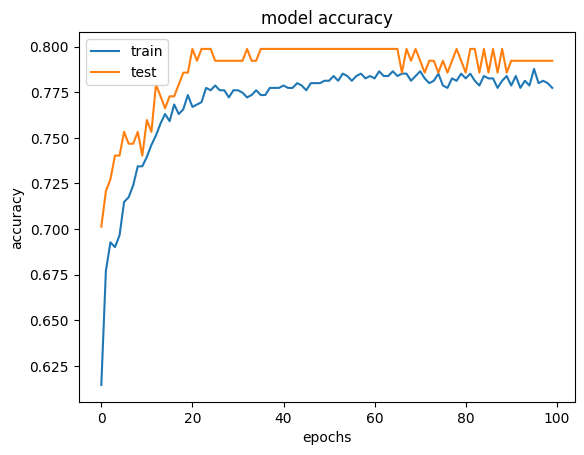

In [15]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
#determine the predictions for the training set
prediction_train = get_predictions(X_train)
print(prediction_train)

[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [17]:
calculate_accuracy(y_train, prediction_train)

Accuracy: 80.00%


Precision: 0.76
Recall: 0.64
F1 Score: 0.70


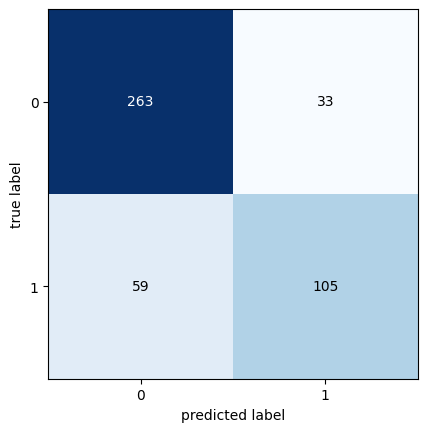

In [18]:
print_confusion_matrix(y_train, prediction_train)

In [19]:
#determine the accuracy for cv set
prediction_cv = get_predictions(X_cv)


In [20]:
calculate_accuracy(y_cv, prediction_cv)

Accuracy: 75.97%


Precision: 0.60
Recall: 0.53
F1 Score: 0.56


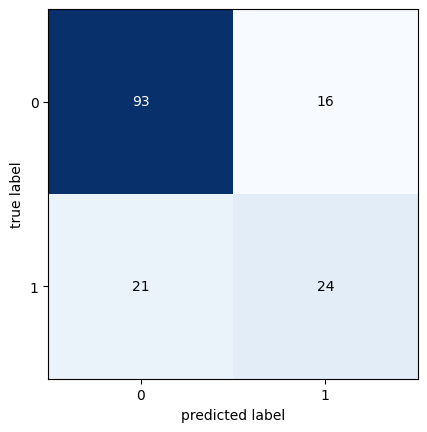

In [21]:
print_confusion_matrix(y_cv, prediction_cv)

In [22]:
#evaluate model on test set
print("Evaluate on test Data")
results = model.evaluate(X_test, y_test)
print(f"test loss, test acc: {results}")

Evaluate on test Data
5/5 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.7857
test loss, test acc: [0.40609464049339294, 0.7857142686843872]


In [23]:
#determine the accuracy for test set
prediction_test = get_predictions(X_test)


In [24]:
calculate_accuracy(y_test, prediction_test)

Accuracy: 82.47%


Precision: 0.82
Recall: 0.69
F1 Score: 0.75


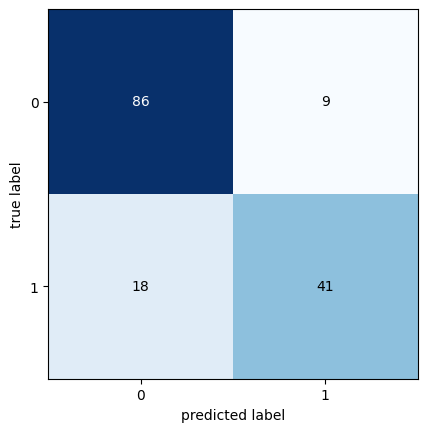

In [25]:
print_confusion_matrix(y_test, prediction_test)